# Геннадий Балан

# Домашняя работа по алгоритмам анализа данных№3

# Тема: Классификация и логистическая регрессия

##### Задача 1
*Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [97]:
import numpy as np
from sklearn import datasets
import sklearn.metrics
import matplotlib.pyplot as plt

In [68]:
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [69]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [70]:
y_pred

NameError: name 'y_pred' is not defined

In [71]:
def calc_logloss(y, y_pred):
    #if 0 < y_pred and y_pred < 1:  # учитываем область определения логарифмической функции
        err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
        return err
    #else:
        #return 'Параметр не входит в область определения функции'
        
              
    
   

In [72]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [73]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

<ipython-input-71-9770e8246c13>:3: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-71-9770e8246c13>:3: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


nan

##### Задача 2
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [74]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [75]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [76]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [77]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [78]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [79]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [80]:
def eval_model(X, y, iterations, eta=1e-3):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [81]:
W = eval_model(X_st, y, iterations=800, eta=1e-3)# увеличил количество итераций,шаг увеличил в 10 раз

0 [ 0.49633477 -0.13971518  0.64766116  1.52246371] 1.1785958344356262
80 [ 0.46724558 -0.25141887  0.64481207  1.47876122] 0.9876819048321799
160 [ 0.44087778 -0.35284484  0.64097176  1.43879974] 0.8297518871175656
240 [ 0.41752485 -0.4408464   0.63709618  1.40374413] 0.7099180105153468
320 [ 0.39737161 -0.51204161  0.63448071  1.37481178] 0.630182962749474
400 [ 0.3802473  -0.56578851  0.63387547  1.35226238] 0.5834626177311397
480 [ 0.36561452 -0.60497728  0.63515583  1.33515448] 0.55757062632205
560 [ 0.35287229 -0.63348569  0.63783402  1.3221831 ] 0.5430133679833171
640 [ 0.34153983 -0.65445577  0.64146347  1.31225607] 0.5344242539638147
720 [ 0.33127129 -0.67007692  0.64572655  1.30458307] 0.5290446450062664


In [82]:
iterations = 800
loss = 0
def log_loss(w, X, y):# функция кросс-энтропии
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    
    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

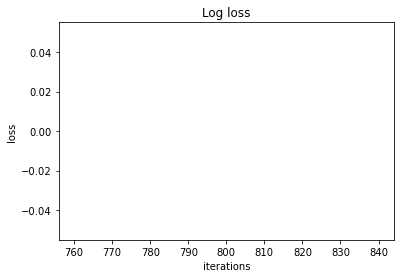

In [83]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(iterations, loss)
plt.show()


##### Задача 3
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [71]:
m = X.shape[0]
y_pred_proba = np.zeros(m)

In [72]:
def calc_pred_proba(X, W):
    
    return y_pred_proba
    

In [73]:
y_pred_proba

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### Задача 4
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [84]:
def calc_pred(X, W):
    m = X.shape[0]
    
    y_pred = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, W)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_pred[i] = 1
        elif (A[i] <= 0.5):
            y_pred[i] = 0

    return y_pred

##### Задача5 
*Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [95]:

#def calc_confusion_matrix(y_true, y_pred): 
    
    # функция матрицы ошибок
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative"]
y_pred = ["positive", "negative", "positive", "positive", "negative", "positive", "positive"]

r = sklearn.metrics.confusion_matrix(y_true, y_pred) # реализация функции матрицы ошибок
print(r)
    
    
    

[[1 2]
 [1 3]]


In [98]:
# def calc_accuracy(a,X)
r = np.flip(r)

acc = (r[0][0] + r[-1][-1]) / np.sum(r) # вычисление accuracy--точности предсказания
print(acc)

0.5714285714285714


In [101]:
# def calc_precision(a, X)
precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label="positive") # отношение числа верных положительных к общему
                                                                                  # количеству положительных значений(верных и неверных)  
print(precision)

0.6


In [102]:
# def calc_recall(a, X)
recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="positive") # вычисление полноты положительной выборки
print(recall)

0.75


In [105]:
from sklearn.metrics import f1_score

res=f1_score(x, y, average='macro') # реализация метрики f1
print("F1 score:", res)


F1 score: 0.2857142857142857


##### Задача 6
Могла ли модель переобучиться? Почему?

In [ ]:
Думаю,что не могже,так как показания метрик у нас в пределах нормы.